[PRESENTACION](https://www.canva.com/design/DAFhJpIfY-Q/2goo8FcB4MD258OTWJcMPw/edit?utm_content=DAFhJpIfY-Q&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)



# Situación

La empresa de 15.000 colaboradores enfrenta 3.571 Renuncias anuales, lo que equivale a un Attrition del 23%


Fuente del Dataset: 
https://www.kaggle.com/datasets/krismurphy01/data-lab?select=HR_Engagement_Sat_Sales_UpdatedV4.0.csv

# El problema

La salida por renuncia de estos colaboradores, y su posterior reposición, está generando:

1) Pérdida de tiempo, por:
*   Contratación
*   Inducción
*   Inducción
*   Capacitación
*   Curva de aprendizaje

2) Ineficiencias:
*   Sobre-exigencia
*   Retrasos
*   Pérdida de Know How
*   Pérdida de personal valioso
*   Burnout

Como consecuencia, se generan impacto en:
*   COSTOS
*   RENTABILIDAD
*   COMPROMISO
*   MOTIVACIÓN
*   NPS

# Objetivo

**El objetivo del presente trabajo es gestionar el Nivel de Renuncia, maximizando la inversión necesaria y los resultados esperados.**




# Propuestas:

**Propuesta A)**

No hacer nada.

**Mantener el problema y sus costos asociados.**

**Propuesta B)**

Invertir mucho dinero en 15.000 colaboradores

Invertir en todas las temáticas 

**Seguramente pueda generar alguna mejora en el Attrition**

**Propuesta C)**

Proponemos:
Accionar SOLO sobre una población mínima.
Accionar SOLO sobre una temática por segmento.

**PROPONEMOS UNA INVERSION:**
*  **MÍNIMA**
*  **MUY PRECISA**
*  **Y CON ALTO IMPACTO SOBRE EL ATTRITION.**

# Proyecto

A FIN DE ACTUAR Y TOMAR MEDIDAS PARA ACCIONAR PARA EVITAR LAS RENUNCIAS NOS DISPONEMOS A:

*  Estudiar la información.
*  Predecir quién tiene mayor probabilidad de renunciar.
*  Identificar los factores o temáticas que más inciden en los niveles de renuncia o no renuncia.
*  Identificar las áreas o temáticas a trabajar.
*  Identificar la población sobre la cual trabajar.

# Análisis Exploratorio

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd '/content/gdrive/MyDrive/DS'
dsM = pd.read_csv('dataset_04.csv',sep=',') #Importo
dsM.dropna(subset=['Men_Leave'], inplace=True) #Me quedo con los Masculinos sin NaN

/content/gdrive/MyDrive/DS


In [4]:
%cd '/content/gdrive/MyDrive/DS'
dsF = pd.read_csv('dataset_04.csv',sep=',') #importo
dsF = dsF[(dsF.Gender == "F")] #Me quedo con los Femeninos, que están todos ok.

ds1 = pd.merge(dsM, dsF, how='outer') # Hago un merge para unir los Masculinos y los Femeninos en un dataset final.

/content/gdrive/MyDrive/DS


In [5]:
# Elimino los campos "Rissing Star" y "CSR Factor" dado que en la mayoria de los registros están vacíos.
ds1.drop('Rising_Star', axis= 1, inplace=True)
ds1.drop('CSR Factor', axis= 1, inplace=True)


In [6]:
# Remplazamos los vacios en Critical, considerando que si no estan identificados como critícos no lo son.
ds1['Critical'].fillna(0, inplace=True)

In [7]:
# Eliminamos los registros en los que 'EMP_Sat_OnPrem_1' está vacío.
ds1.dropna(subset=['EMP_Sat_OnPrem_1'], inplace=True)

In [8]:
# Revisamos las estadísticas de los registros.
ds1.describe()

ID  Will_Relocate      Critical  Trending Perf  Talent_Level  \
count  12355.000000   12355.000000  12355.000000        12355.0       12355.0   
mean    6809.119790       0.499636      0.038527            3.0           6.0   
std     4306.687772       0.500020      0.192472            0.0           0.0   
min        1.000000       0.000000      0.000000            3.0           6.0   
25%     3110.500000       0.000000      0.000000            3.0           6.0   
50%     6236.000000       0.000000      0.000000            3.0           6.0   
75%    10557.500000       1.000000      0.000000            3.0           6.0   
max    14868.000000       1.000000      1.000000            3.0           6.0   

       Validated_Talent_Level  Percent_Remote  EMP_Sat_OnPrem_1  \
count                 12355.0    12355.000000           12355.0   
mean                      6.0        0.580121               3.0   
std                       0.0        0.192177               0.0   
min                       6.0        0.400000               3.0   
25%                       6.0        0.400000               3.0   
50%                       6.0        0.500000               3.0   
75%                       6.0        0.800000               3.0   
max                       6.0        0.800000               3.0   

       EMP_Sat_OnPrem_2  EMP_Sat_OnPrem_3  ...  Emp_Competitive_4  \
count      12355.000000      12355.000000  ...       12355.000000   
mean           2.680777          3.680777  ...           3.008256   
std            0.732520          0.732520  ...           1.408282   
min            1.000000          2.000000  ...           1.000000   
25%            3.000000          4.000000  ...           2.000000   
50%            3.000000          4.000000  ...           3.000000   
75%            3.000000          4.000000  ...           4.000000   
max            3.000000          4.000000  ...           5.000000   

       Emp_Competitive_5  Emp_Collaborative_1  Emp_Collaborative_2  \
count       12355.000000         12355.000000          12355.00000   
mean            2.983084             2.976932              1.64824   
std             1.413168             1.413653              0.82504   
min             1.000000             1.000000              1.00000   
25%             2.000000             2.000000              1.00000   
50%             3.000000             3.000000              2.00000   
75%             4.000000             4.000000              2.00000   
max             5.000000             5.000000              5.00000   

       Emp_Collaborative_3  Emp_Collaborative_4  Emp_Collaborative_5  \
count         12355.000000         12355.000000         12355.000000   
mean              3.005989             2.999191             3.017078   
std               1.409672             1.409340             1.411790   
min               1.000000             1.000000             1.000000   
25%               2.000000             2.000000             2.000000   
50%               3.000000             3.000000             3.000000   
75%               4.000000             4.000000             4.000000   
max               5.000000             5.000000             5.000000   

       Sensor_StepCount  Sensor_Heartbeat(Average/Min)  \
count      12355.000000                   12355.000000   
mean        3103.687171                      78.242979   
std         1744.792249                       7.784133   
min         1000.000000                      60.000000   
25%         1597.000000                      74.000000   
50%         2604.000000                      78.000000   
75%         4509.000000                      86.000000   
max         8500.000000                      90.000000   

       Sensor_Proximity(1-highest/10-lowest)  
count                           12355.000000  
mean                                6.690409  
std                                 2.501429  
min                                 1.000000  
25%                    

In [9]:
ds1['EMP_Engag_Prom'] = ds1[['EMP_Engagement_1','EMP_Engagement_2','EMP_Engagement_3','EMP_Engagement_4','EMP_Engagement_5']].mean(axis=1)

In [11]:
# Eliminamos columnas no relevantes
ds1.drop(['ID','time_spend_company','Sensor_StepCount','Department','GEO','Role','Will_Relocate','Critical','Work_accident','promotion_last_5years','sales','salary','Gender','Emp_Work_Status2','Emp_Work_Status_3','Emp_Work_Status_4','Emp_Work_Status_5','Emp_Position','Emp_Title','Emp_Competitive_1','Emp_Competitive_2','Emp_Competitive_3','Emp_Competitive_4','Emp_Competitive_5','Emp_Collaborative_1','Emp_Collaborative_2','Emp_Collaborative_3','Emp_Collaborative_4','Emp_Collaborative_5'], axis=1, inplace=True)

In [12]:
# Revisamos las estadísticas de los campos mas relevantes
ds1.describe()

Trending Perf  Talent_Level  Validated_Talent_Level  Percent_Remote  \
count        12355.0       12355.0                 12355.0    12355.000000   
mean             3.0           6.0                     6.0        0.580121   
std              0.0           0.0                     0.0        0.192177   
min              3.0           6.0                     6.0        0.400000   
25%              3.0           6.0                     6.0        0.400000   
50%              3.0           6.0                     6.0        0.500000   
75%              3.0           6.0                     6.0        0.800000   
max              3.0           6.0                     6.0        0.800000   

       EMP_Sat_OnPrem_1  EMP_Sat_OnPrem_2  EMP_Sat_OnPrem_3  EMP_Sat_OnPrem_4  \
count           12355.0      12355.000000      12355.000000      12355.000000   
mean                3.0          2.680777          3.680777          2.680777   
std                 0.0          0.732520          0.732520          0.732520   
min                 3.0          1.000000          2.000000          1.000000   
25%                 3.0          3.000000          4.000000          3.000000   
50%                 3.0          3.000000          4.000000          3.000000   
75%                 3.0          3.000000          4.000000          3.000000   
max                 3.0          3.000000          4.000000          3.000000   

       EMP_Sat_OnPrem_5  EMP_Sat_Remote_1  ...  average_montly_hours  \
count      12355.000000      12355.000000  ...          12355.000000   
mean           3.933549          2.741724  ...            200.337434   
std            1.358168          0.746848  ...             50.989276   
min            1.000000          2.000000  ...             96.000000   
25%            4.000000          2.000000  ...            154.000000   
50%            4.000000          3.000000  ...            198.000000   
75%            5.000000          3.000000  ...            245.000000   
max            5.000000          5.000000  ...            310.000000   

       left_Company  LinkedIn_Hits  Emp_Identity      Emp_Role  Women_Leave  \
count  12355.000000   12355.000000  12355.000000  12355.000000  7538.000000   
mean       0.282720      21.197086      1.963254      1.938567     0.706023   
std        0.450339      19.760287      0.958982      0.933362     0.455612   
min        0.000000       1.000000      1.000000      1.000000     0.000000   
25%        0.000000       5.000000      1.000000      1.000000     0.000000   
50%        0.000000      10.000000      2.000000      2.000000     1.000000   
75%        1.000000      37.000000      2.000000      2.000000     1.000000   
max        1.000000      65.000000      5.000000      5.000000     1.000000   

         Men_Leave  Sensor_Heartbeat(Average/Min)  \
count  4817.000000                   12355.000000   
mean      0.909280                      78.242979   
std       0.287241                       7.784133   
min       0.000000                      60.000000   
25%       1.000000                      74.000000   
50%       1.000000                      78.000000   
75%       1.000000                      86.000000   
max       1.000000                      90.000000   

       Sensor_Proximity(1-highest/10-lowest)  EMP_Engag_Prom  
count                           12355.000000    12355.000000  
mean                                6.690409        3.521473  
std                                 2.501429        1.080815  
min                                 1.000000        1.800000  
25%                                 6.000000        1.800000  
50%                                 7.000000        4.200000  
75%                                 9.000000        4.200000  
max                                10.000000        4.200000  

[8 rows x 31 columns]

Text(0.5, 1.0, 'Dispersión de Cantidad de Proyectos al año')

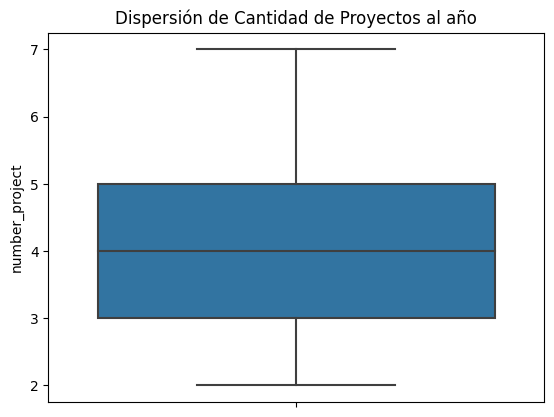

In [13]:
# Axis-level
ax = sns.boxplot(y="number_project", data=ds1)
plt.title('Dispersión de Cantidad de Proyectos al año')


Encontramos una dispersión en la población evaluada respecto a la cantidad anual de proyectos en lo que trabajan los colaboradores.

Text(0.5, 1.0, 'Renuncias segun Cantidad de Proyectos')

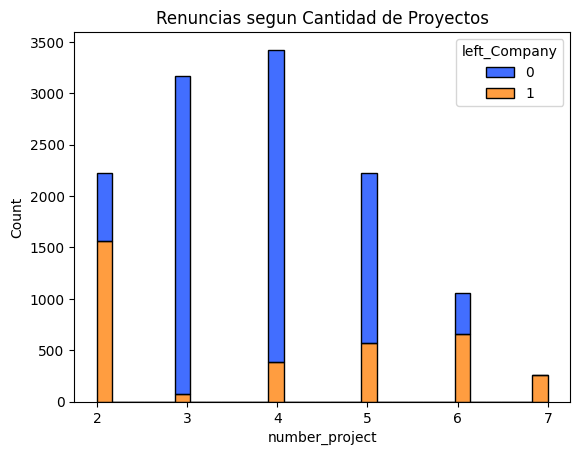

In [14]:
sns.histplot(data=ds1, x="number_project", hue="left_Company", multiple="stack", palette='bright')
plt.title('Renuncias segun Cantidad de Proyectos')

Al revisar los niveles de renuncia encontramos distintos comportamientos, entre los que se destacan que:

*   Con mas de 3 proyectos anuales, incrementa el % de renuncias conforme incrementan la cantidad de proyectos.

*   Con 7 proyectos el 100% termina renunciando.

*   Con sólo 2 proyectos anuales los niveles de renuncia son del 42%.





Text(0.5, 1.0, 'Renuncias según nivel de Engagement')

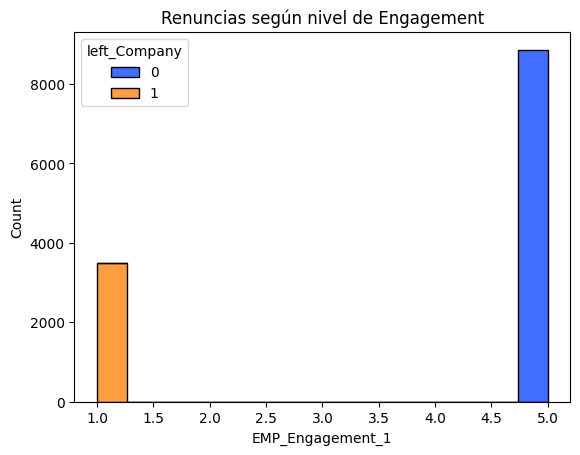

In [15]:
sns.histplot(data=ds1, x="EMP_Engagement_1", hue="left_Company", multiple="stack", palette='bright')
plt.title('Renuncias según nivel de Engagement')

Las encuestas de Engagement aportan una valoración del compromiso de los colaboradores.

Analizando la relacion entre los resultados de Encuesta de Engagement y las renuncias, encontramos que el 100% de los colaboradores con bajo Engagement renunciaron.

Mientas que el 100% de los colaboradores que con altos niveles de Engagement en las encuestas no renunciaron.


Text(0.5, 1.0, 'Renuncias según nivel de Engagement')

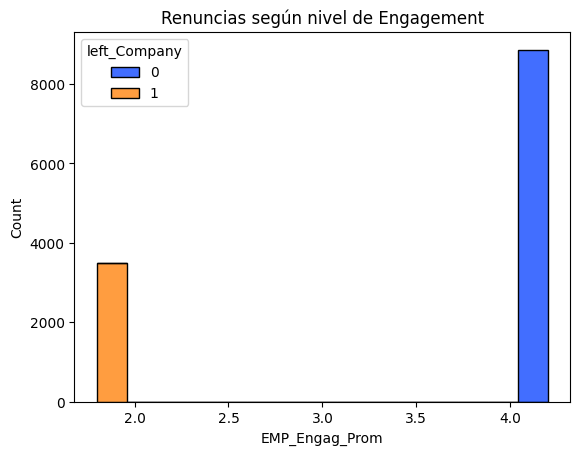

In [16]:
sns.histplot(data=ds1, x="EMP_Engag_Prom", hue="left_Company", multiple="stack", palette='bright')
plt.title('Renuncias según nivel de Engagement')

Calculamos el promedio de las 5 encuestas de Engagemente de las que se cuenta con información, y se mantiene la relación: con bajo nivel de Engagement el 100% de los colaboradores renuncia, mientras que el 100% de los colaboradores con alto Engagement o conmpromiso no renuncia.

In [17]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [18]:
import pandas_profiling

<ipython-input-18-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [19]:
#Principales medidas estadisticas
ds1.describe().T

count        mean        std    min  \
Trending Perf                          12355.0    3.000000   0.000000   3.00   
Talent_Level                           12355.0    6.000000   0.000000   6.00   
Validated_Talent_Level                 12355.0    6.000000   0.000000   6.00   
Percent_Remote                         12355.0    0.580121   0.192177   0.40   
EMP_Sat_OnPrem_1                       12355.0    3.000000   0.000000   3.00   
EMP_Sat_OnPrem_2                       12355.0    2.680777   0.732520   1.00   
EMP_Sat_OnPrem_3                       12355.0    3.680777   0.732520   2.00   
EMP_Sat_OnPrem_4                       12355.0    2.680777   0.732520   1.00   
EMP_Sat_OnPrem_5                       12355.0    3.933549   1.358168   1.00   
EMP_Sat_Remote_1                       12355.0    2.741724   0.746848   2.00   
EMP_Sat_Remote_2                       12355.0    4.239336   0.970976   3.00   
EMP_Sat_Remote_3                       12355.0    3.239336   0.970976   2.00   
EMP_Sat_Remote_4                       12355.0    3.680696   0.582608   3.00   
EMP_Sat_Remote_5                       12355.0    3.797977   1.428047   2.00   
EMP_Engagement_1                       12355.0    3.869122   1.801358   1.00   
EMP_Engagement_2                       12355.0    4.151841   1.351018   2.00   
EMP_Engagement_3                       12355.0    3.717280   0.450339   3.00   
EMP_Engagement_4                       12355.0    3.434561   0.900679   2.00   
EMP_Engagement_5                       12355.0    2.434561   0.900679   1.00   
last_evaluation                        12355.0    0.688435   0.170389   0.36   
number_project                         12355.0    3.796762   1.282208   2.00   
average_montly_hours                   12355.0  200.337434  50.989276  96.00   
left_Company                           12355.0    0.282720   0.450339   0.00   
LinkedIn_Hits                          12355.0   21.197086  19.760287   1.00   
Emp_Identity                           12355.0    1.963254   0.958982   1.00   
Emp_Role                               12355.0    1.938567   0.933362   1.00   
Women_Leave                             7538.0    0.706023   0.455612   0.00   
Men_Leave                               4817.0    0.909280   0.287241   0.00   
Sensor_Heartbeat(Average/Min)          12355.0   78.242979   7.784133  60.00   
Sensor_Proximity(1-highest/10-lowest)  12355.0    6.690409   2.501429   1.00   
EMP_Engag_Prom                         12355.0    3.521473   1.080815   1.80   

                                          25%     50%     75%    max  
Trending Perf                            3.00    3.00    3.00    3.0  
Talent_Level                             6.00    6.00    6.00    6.0  
Validated_Talent_Level                   6.00    6.00    6.00    6.0  
Percent_Remote                           0.40    0.50    0.80    0.8  
EMP_Sat_OnPrem_1                         3.00    3.00    3.00    3.0  
EMP_Sat_OnPrem_2                         3.00    3.00    3.00    3.0  
EMP_Sat_OnPrem_3                         4.00    4.00    4.00    4.0  
EMP_Sat_OnPrem_4                         3.00    3.00    3.00    3.0  
EMP_Sat_OnPrem_5                         4.00    4.00    5.00    5.0  
EMP_Sat_Remote_1                         2.00    3.00    3.00    5.0  
EMP_Sat_Remote_2                         3.00    5.00    5.00    5.0  
EMP_Sat_Remote_3                         2.00    4.00    4.00    4.0  
EMP_Sat_Remote_4                         3.00    4.00    4.00    5.0  
EMP_Sat_Remote_5                         2.00    5.00    5.00    5.0  
EMP_Engagement_1                         1.00    5.00    5.00    5.0  
EMP_Engagement_2                         2.00    5.00    5.00    5.0  
EMP_Engagement_3                         3.00    4.00    4.00    4.0  
EMP_Engagement_4                         2.00    4.00    4.00    4.0  
EMP_Engagement_5                         1.00    3.00    3.00    3.0  
last_evaluation                          0.54    0.66    0.8

In [20]:
#Data Profiling
profile = pandas_profiling.ProfileReport(ds1)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Insight

El compromiso de los colaboradores relevado por las encuestas nos estarían señalando a los colaboradores que tienen probabilidad de renuncia (100%)

La cantidad anual de proyectos tiene una correlación moderada con las renuncias (61%)